In [3]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
# HIDDEN

"""Data from the-numbers.com
Market Share for each Genre, 1995-2015"""

movies = Table.from_rows([['Comedy', 2148, 40718907106, 6450551587, 0.2219],
['Adventure', 640, 39802236598, 6016007644, 0.2169],
['Action', 730, 32903666523, 5093305192, 0.1793],
['Drama', 3964, 30869045400, 4989643229, 0.1682],
['Thriller/Suspense', 780, 15382290370, 2381261942, 0.0838],
['Romantic Comedy', 495, 9233580252, 1513040588, 0.0503],
['Horror', 435, 8207622852, 1295294269, 0.0447],
['Documentary', 1597, 1914590569, 299884741, 0.0104],
['Musical', 130, 1901046400, 287726557, 0.0104],
['Black Comedy', 138, 1166558177, 175773412, 0.0064],
['Western', 49, 810612068, 118538558, 0.0044],
['Concert/Performance', 52, 355145994, 49262409, 0.0019],
['Multiple Genres', 25, 17634411, 2278270, 0.0001],
['Reality', 3, 398840, 47699, 0.0000]],
['GENRE', 'COUNT', 'BOXOFFICE', 'TICKETS', 'SHARE'])



In [5]:
# HIDDEN
genres = movies.select(['GENRE', 'COUNT'])
tableA = genres.sort('COUNT')
tableB = genres.sort('GENRE', descending=True)

Categorical Data and Bar Charts
-----------------------------

Now that we have examined several graphics produced by others, it is time to produce some of our own. We will start with *bar charts*, a type of graph with which you might already be familiar. A bar chart shows the distribution of a *categorical variable*, that is, a variable whose values are categories. In human populations, examples of categorical variables include gender, ethnicity, marital status, country of citizenship, and so on.

A bar chart consists of a sequence of rectangular bars, one corresponding to each category. The length of each bar is proportional to the number of entries in the corresponding category.

We will start by drawing a bar chart of the genres of a set of movies. The data are in a table called `tableA`, which looks like this:

In [6]:
tableA

GENRE,COUNT
Reality,3
Multiple Genres,25
Western,49
Concert/Performance,52
Musical,130
Black Comedy,138
Horror,435
Romantic Comedy,495
Adventure,640
Action,730


The first column of `tableA` is labeled `GENRE`. It consists of the names of various genres of movie. More formally, it contains the names of the categories of the genre variable. The second column is labeled `COUNT`, and contains the number of movies in each genre.

The method `barh` can be applied to a table with two columns as above, to produce a bar chart consisting of horizontal bars. The horizontal orientation makes it easier to label the bars. The argument that `barh` requires is the name of the column consisting of the categories. The length of each bar is the count in that category. 

Let us apply `barh` to `tableA`, with the `GENRE` column as its argument.

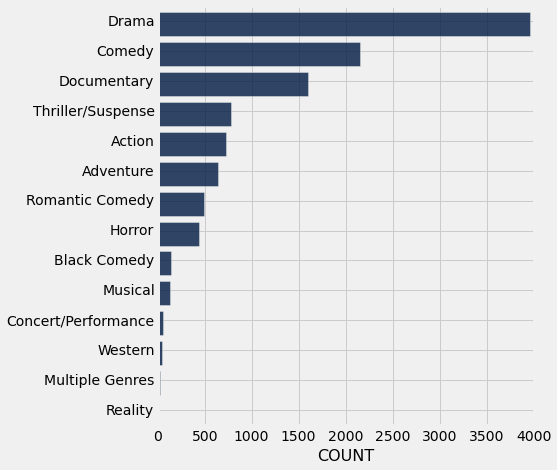

In [7]:
tableA.barh('GENRE')

A different table called `tableB` also consists of movie genre data, in columns labled `GENRE` and `COUNT` just as in `tableA`. Here is a bar chart of the data in `tableB`.

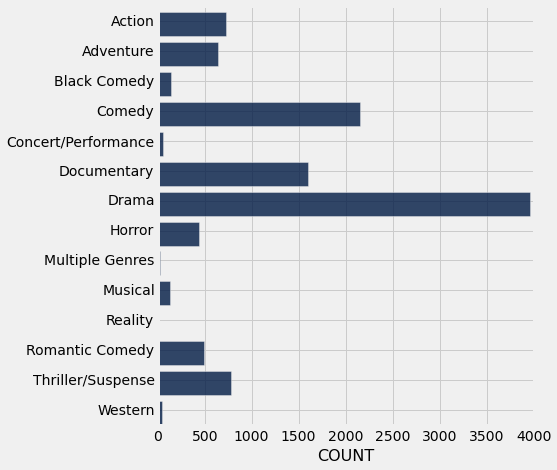

In [8]:
tableB.barh('GENRE')

At first glance, it applears that the two bar charts are quite different. One of them shows a distribution that looks like a smooth curve, while the other is quite irregular. However, closer inspection reveals that the two bar charts are in fact representations of exactly the same set of data. The only difference is in the order in which the categories appear. As we have seen before with graphs that involve two axes, it is important to study *both* axes carefully before making conclusions.

Unlike numbers, categories do not have a unique ordering relative to each other. The user determines the order in which they appear. In `tableA`, the categories are arranged so that the bars appear in decreasing order of length. In `tableB`, the categories are listed in alphabetical order. You could randomize the order; the data would tell the same story, though some orderings might make the story a little easier to read.

The data used in the bar charts above represent the market share for each genre of Hollywood movie, from 1995 to 2015. The source is the website [The Numbers](http://www.the-numbers.com/market/genres), subtitled "where data and the movie business meet."

Quantitative Data and Histograms
------------------------------

Many of the variables that data scientists study are *quantitative*. These are measurements of numerical variables such as income, height, age, and so on. In keeping with the movie theme of this section, we will study the amount of money grossed by movies in recent decades. Our source is the [Internet Movie Database](http://www.imdb.com). The IMDb is an online database that consists of a vast repository of information about movies, television shows, video games, and so on.

The table `imdb` consists of IMDb's data on [U.S.A.'s top grossing movies](http://www.imdb.com/boxoffice/alltimegross) of all time. The first column contains the rank of the movie; *Avatar* has the top rank, with a box office gross amount of more than 760 million dollars in the United States. The second column contains the name of the movie; the third contains the U.S. box office gross in dollars; and the fourth contains the same gross amount, in millions of dollars.

There are 627 movies on the list. Here are the top ten.

In [9]:
imdb = Table.read_table('imdb.csv')
imdb

rank,movie,boxoffice,in_millions
1,Avatar (2009),760505847,760.506
2,Titanic (1997),658672302,658.672
3,Jurassic World (2015),642978555,642.979
4,The Avengers (2012),623279547,623.28
5,The Dark Knight (2008),533316061,533.316
6,Star Wars: Episode I - The Phantom Menace (1999),474544677,474.545
7,Star Wars (1977),460935665,460.936
8,Avengers: Age of Ultron (2015),457744064,457.744
9,The Dark Knight Rises (2012),448130642,448.131
10,Shrek 2 (2004),436471036,436.471


Three-digit numbers (even with a few decimal places) are easier to work with than nine-digit numbers. So we will work with a smaller table called *mill*, created by selecting just the fourth column of *imdb*.

The method *hist* applied to one numerical column such as *mill* produces a figure called a *histogram* that looks very much like a bar chart. In this section, we will examine histograms and their properties.

In [10]:
mill = imdb.select(['in_millions'])

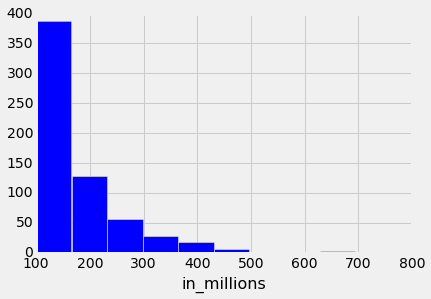

In [11]:
mill.hist()

The figure above shows the distribution of the amounts grossed, in millions of dollars. The amounts have been grouped into contiguous intervals called *bins*. Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, it is worth noting that *hist* has an *endpoint convention*: bins include the data at their left endpoint, but not the data at their right endpoint. Sometimes, adjustments have to be made in the first or last bin, to ensure that the smallest and largest values of the variable are included. You saw an example of such an adjustment in the Census data used in the Tables section, where an age of "100" years actually meant "100 years old or older."

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. We can also see that there the list contains no movie that grossed fewer than 100 million dollars; that is because we are considering only the top grossing movies of all time. It is a little harder to see exactly where the edges of the bins are placed. For example, it is not clear exactly where the value 200 lies on the horizontal axis, and so it is hard to judge exactly where the first bar ends and the second begins.

The optional argument *bins* can be used with *hist* to specify the edges of the bars. It must consist of a sequence of numbers that includes the left end of the first bar and the right end of the last bar. As the highest gross amount is somewhat over 760 on the horizontal scale, we will start by setting *bins* to be the array consisting of the numbers 100, 150, 200, 250, and so on, ending with 800.  

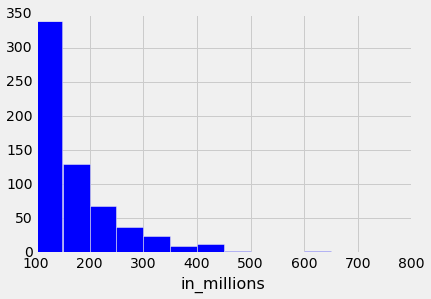

In [12]:
mill.hist(bins=np.arange(100,810,50))

This figure is easier to read. On the horizontal axis, the labels 100, 200, 300, and so on are centered at the corresponding values. The number of movies that grossed between 100 million and 150 million dollars appears to be around 340; the number that grossed between 150 million and 200 million dollars appears to be around 125; and so on. 

A large majority of the movies grossed between 100 million and 250 million dollars. A very small number grossed more than 600 million dollars. This results in the figure being "skewed to the right,", or, less formally, having "a long right hand tail." Distributions of variables like income or rent often have this kind of shape.

The exact counts are given below. The entries of 250 million dollars or more have been collected in a single bin. The total of the counts is 627, which is the number of movies on the list.

In [13]:
bins, counts = ["[100, 150)", "[150,200)", "[200, 250)", "[250, 800)"],[338,129,68,92]
bincounts = Table([bins, counts], ['bins','counts'])
bincounts

bins,counts
"[100, 150)",338
"[150,200)",129
"[200, 250)",68
"[250, 800)",92


In [14]:
# HIDDEN

bincounts.select(['counts']).sum()

counts
627


**What is wrong with this picture?**

Let us try to redraw the histogram with just four bins: [100, 150), [150, 200), [200, 250), and [250, 800). As we saw in the table of counts, the [250, 800) bin contains 92 movies.

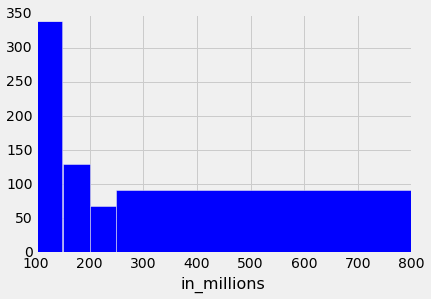

In [15]:
mill.hist(bins=[100, 150, 200, 250, 800])

Even though the method used is called *hist*, **the figure above is NOT A HISTOGRAM.** It gives the impression that there are many more movies in the 250-800 bin than in the 100-150 bin, and indeed more than in the entire range 100-250. The height of each bar is simply plotted the number of movies in the bin, *without accounting for the difference in the widths of the bins*.

**So what is a histogram?**

The figure above shows that what the eye perceives as "big" is area, not just height. This is particularly important when the bins are of different widths.

That is why a histogram has two defining properties:

1. The bins are contiguous (though some might be empty) and are drawn to scale.
2. The **area** of each bar is proportional to the number of entries in the bin. 

Property 2 is the key to drawing a histogram, and is usually achieved as follows:

$$
\mbox{area of bar} ~=~ \mbox{proportion of entries in bin}
$$

When drawn using this method, the histogram is said to be drawn *on the density scale*, and the total area of the bars is equal to 1.

To calculate the height of each bar, use the fact that the bar is a rectangle:

$$
\mbox{area of bar} = \mbox{height of bar} \times \mbox{width of bin}
$$

and so

$$
\mbox{height of bar} ~=~ 
\frac{\mbox{area of bar}}{\mbox{width of bin}} ~=~
\frac{\mbox{proportion of entries in bin}}{\mbox{width of bin}}
$$

For *hist* to draw a histogram on the density scale, the Boolean option *normed* must have the value *True*. You can think of "normed" as shorthand for "follows the norm of the density scale."

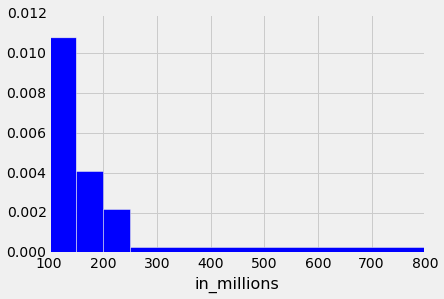

In [16]:
mill.hist(bins=[100, 150, 200, 250, 800], normed=True)

This is a reasonable representation of the data, though of course some detail has been lost. The level of detail in a histogram depends on the level of detail in the data as well as on the choices made by the user. Before we explore this idea further, let us first check that the numbers on the vertical axis above are consistent with the heights that we would calculate.

There are 129 movies in the [150, 200) bin. The proportion of movies in the bin is therefore 129/627, and the width of the bin is 200-150. So the height of the bar above that bin should be

$$
\frac{129/627}{200-150} ~=~ 0.0041148325358851675
$$

That agrees with the height of the bar as shown in the figure. You might want to check that the other heights also agree with what you would calculate.

**The level of detail, and the flat tops of the bars**

Take another look at the [150, 200) bin in the figure above. The flat top of the bar, at the level 0.004, hides the fact that the movies are somewhat unevenly distributed across the bin. To see this, let us split the [150, 200) bin into five narrower bins of width 10 million dollars each:

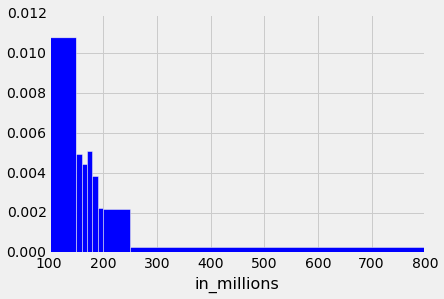

In [17]:
mill.hist(bins=[100, 150, 160, 170, 180, 190, 200, 250, 800], normed=True)

Some of the skinny bars are taller than 0.004 and others are shorter. By putting a flat top at 0.004 over the whole bin, we are deciding to ignore the finer detail and use the flat level as a rough approximation. Often, though not always, this is sufficient for understanding the general shape of the distribution.

Notice that because we have the entire dataset, we can draw the histogram in as fine a level of detail as the data and our patience will allow. However, if you are looking at a histogram in a book or on a website, and you don't have access to the underlying dataset, then it becomes important to have a clear understanding of the "rough approximation" of the flat tops.

**The density scale**

The height of each bar is a proportion divided by a bin width. Thus, for this datset, the values on the vertical axis are "proportions per million dollars." To understand this better, look again at the [150, 200) bin. The bin is 50 million dollars wide. So we can think of it as consisting of 50 narrow bins that are each 1 million dollars wide. The bar's height of roughly "0.004 per million dollars" means that in each of those 50 skinny bins of width 1 million dollars, the proportion of movies is roughly 0.004. 

Thus the height of a histogram bar is a proportion per unit on the horizontal axis, and can be thought of as the *density* of entries per unit width. 

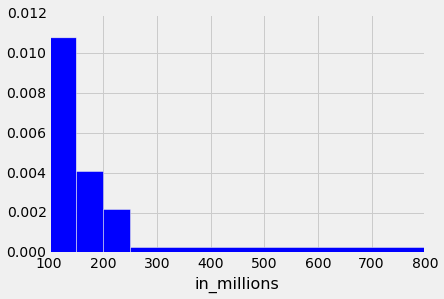

In [18]:
imdb.select(['in_millions']).hist(bins=[100, 150, 200, 250, 800], normed=True)


**Density Q&A**

Look again at the histogram, and this time compare the [200, 250) bin with the [250, 800) bin. 

**Q**: Which has more movies in it? 

**A**: The [250, 800) bin. It has 92 movies, compared with 68 movies in the [200, 250) bin.

**Q**: Then why is the [250, 800) bar shorter than the [200, 250) bar?

**A**: Because height represents density per unit width, not the number of movies in the bin. The [250, 800) bin has more movies than the [200, 250) bin, but it is also a whole lot wider. So the density is much lower.

**Bar chart or histogram?** 

Bar charts display the distributions of categorical variables. All the bars in a bar chart have the same width. The lengths (or heights, if the bars are drawn vertically) of the bars are proportional to the number of entries.

Histograms display the distributions of quantitative variables. The bars can have different widths. The areas of the bars are proportional to the number of entries. 

**Multiple bar charts and histograms**

In all the examples in this section, we have drawn a single bar chart or a single histogram. However, if a data table contains several columns, then *barh* and *hist* can be used to draw several graphs at once. We will cover this feature in a later section.